#Análise de Correspondência

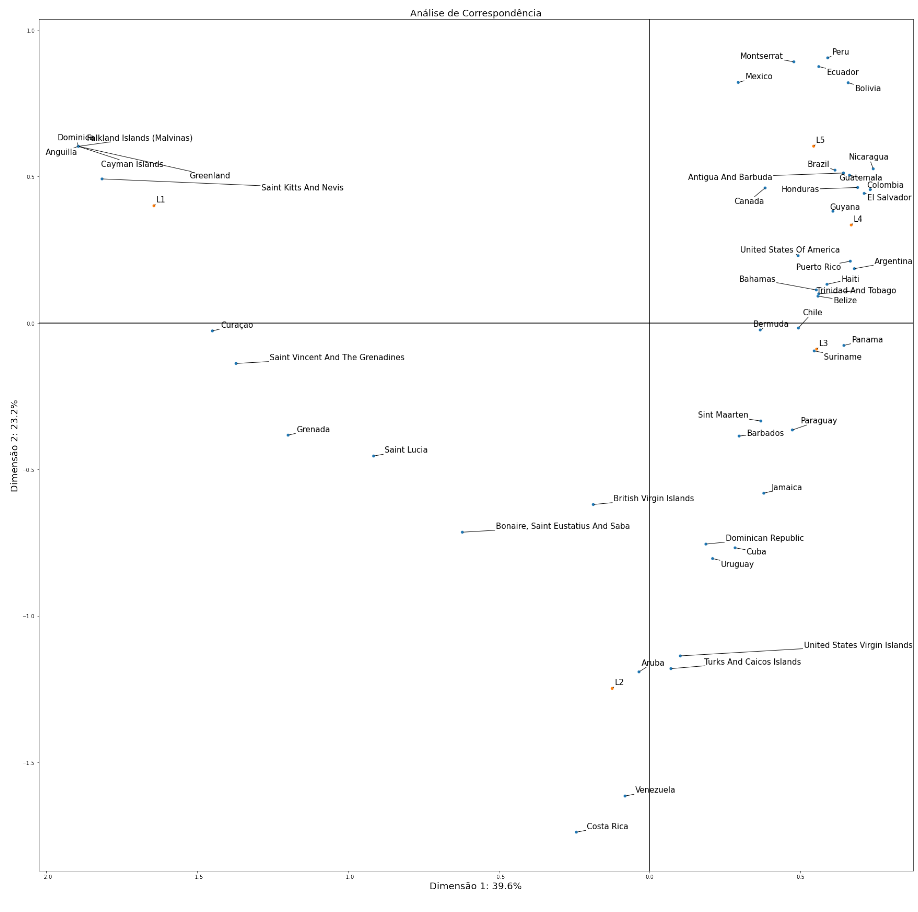

A análise de correspondência simples é baseada em resultados clássicos bastante diretos na teoria de matrizes. O
resultado central é a decomposição de valor singular (SVD), que é a base de
muitos métodos multivariados, como análise de componente principal, 
análise de correlação canônica, todas as formas de biplots lineares e análises discriminantes.

##Instalar e Importar Libs 

In [1]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=8a7d877b3eb9bbdb063047ea1fb216e77884b36d6d3b6e321f2b6d5fe1aade38
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [28]:
import pandas as pd #Manipulção de DataFrames
import numpy as np #Manipulações numéricas
import math #Biblioteca matemática
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos


from numpy.linalg import norm #Encontrar o valor da norma matricial ou da norma vectorial
from random import normalvariate #Variações normalizadas
from scipy.stats import chi2_contingency #Criação de Matriz de Contigência
from adjustText import adjust_text #Ajuste de labels gráficas
np.set_printoptions(suppress=True) 

##Leitura da Base de dados

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/covid_america_weekly.csv')
df.head()

,country,week,cumulative_cases,cumulative_deaths,population,std_cum_cases,std_cum_deaths,lethality,lethality_Q5
0,Anguilla,1,3,0,15002.0,0.0002,0.0,0.0,L1
1,Anguilla,2,3,0,15002.0,0.0002,0.0,0.0,L1
2,Anguilla,3,3,0,15002.0,0.0002,0.0,0.0,L1
3,Anguilla,4,3,0,15002.0,0.0002,0.0,0.0,L1
4,Anguilla,5,3,0,15002.0,0.0002,0.0,0.0,L1


##Análise dos dados

Verificar todos os países utilizados

In [4]:
pd.DataFrame({'Países': df['country'].sort_values().unique()}) 

,Países
0,Anguilla
1,Antigua And Barbuda
2,Argentina
3,Aruba
4,Bahamas
5,Barbados
6,Belize
7,Bermuda
8,Bolivia
9,"Bonaire, Saint Eustatius And Saba"


##Criação da tabela de frequências

In [5]:
tab=pd.crosstab(index=df['country'], columns=df['lethality_Q5']).to_numpy()
tab

array([[67,  0,  0,  0,  0],
       [ 2,  0,  9, 42, 15],
       [ 0,  1, 35, 28,  6],
       [ 4, 47,  3, 13,  0],
       [ 2,  1, 49,  1, 16],
       [ 1, 28,  5, 11, 23],
       [ 0, 11, 13, 26, 17],
       [ 2, 17, 14,  2, 33],
       [ 0,  0,  0, 15, 53],
       [23, 32, 10,  1,  0],
       [ 3,  0,  8, 46, 15],
       [11, 35,  1,  1, 19],
       [ 8,  2, 18, 19, 30],
       [68,  0,  0,  0,  0],
       [ 3,  9, 24, 34,  0],
       [ 0,  2,  1, 61,  5],
       [ 4, 66,  0,  0,  0],
       [ 0, 33, 16, 13,  6],
       [50, 17,  0,  0,  0],
       [68,  0,  0,  0,  0],
       [ 3, 33, 23,  7,  6],
       [ 2,  0,  1,  2, 67],
       [ 1,  0,  8, 57,  2],
       [66,  0,  0,  0,  0],
       [68,  0,  0,  0,  0],
       [41, 27,  0,  0,  0],
       [ 2,  0,  6, 52,  9],
       [ 2,  0, 25, 24, 18],
       [ 2,  1, 40, 19,  6],
       [ 1,  0, 11, 47, 10],
       [ 1, 20, 44,  2,  2],
       [10,  1,  1,  0, 66],
       [ 4,  0,  0,  0, 64],
       [ 0,  0,  4, 54, 10],
       [ 0,  1

##Calcular Qui²

Antes de iniciar qualquer análise, devemos verificar se as relações entre as nossas variáveis se dá ou não de forma aleatória.

O objetivo de se analisar a distribuição conjunta de duas variáveis qualitativas, é descrever a
associação entre elas. Esperamos que haja uma certa dependência entre as variáveis.

Ao fazer isso estamos realizando um Teste de Hipóteses:

H0 (Hipótese Nula): Aleatoriedade de associação (Não há associação).
H1 (Hipótese Alternativa): Existência de associação.

Buscamos refutar a hipótese nula. Para isso usaremos o Teste de Independência (Qui²):

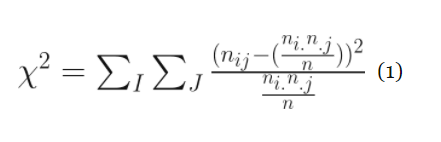

Onde:

n: total de frequências
nij: frequência na linha e coluna
ni: frequência na linha
nj: frequência na coluna

O produto de ni e nj normalizado por n é a frequência esperada para nij no objetivo de independência. Quanto maior o Qui² maior é a certeza de independência.

In [6]:
soma_total = np.sum(tab)

matriz_correspondencia = np.divide(tab,soma_total)

total_linha = np.sum(matriz_correspondencia, axis=1)

total_colunas = np.sum(matriz_correspondencia, axis=0)

Cálcular o produto dos vetores das linhas e colunas

In [7]:
modelo_independencia = np.outer(total_linha, total_colunas)
modelo_independencia

array([[0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00414324, 0.00414937, 0.00414324, 0.00414937, 0.00414324],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00408405, 0.0040901 , 0.00408405, 0.0040901 , 0.00408405],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00390648, 0.00391227, 0.00390648, 0.00391227, 0.00390648],
       [0.00426161, 0.00426793, 0.00426161, 0.00426793, 0.00426161],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00455756, 0.00456431, 0.00455756, 0.00456431, 0.00455756],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00414324, 0.00414937, 0.

Cálculo Manual do Qui²

In [8]:
qui2 = soma_total*np.sum(np.square(matriz_correspondencia - modelo_independencia) / modelo_independencia)
print('Qui²: ',qui2)

Qui²:  6419.643087147196


Comparação com o teste qui² do scipy

In [9]:
qui2, p_value, _ , _ = chi2_contingency(tab)
print('Qui²: ',qui2)
print('p-value: {:.20f}'.format(p_value))

Qui²:  6419.643087147197
p-value: 0.00000000000000000000


As diferenças são medidas por Qui² - distâncias (distâncias euclidianas ponderadas entre linhas normalizadas). 

Elas são calculados dividindo as entradas das linhas por seus respectivos totais das linhas. Os pesos são inversamente proporcionais às raízes quadradas dos totais das colunas.

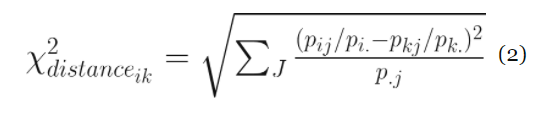

In [10]:
#Normalizar matriz de Correspondência
matriz_correspondencia_norm = np.divide(matriz_correspondencia,total_linha[:, None])

In [11]:
#Criar matriz de tamanho igual à nossa de correspondência
distancias_qui2 = np.zeros((matriz_correspondencia.shape[0], matriz_correspondencia.shape[0]))

total_colunas_norm = np.sum(matriz_correspondencia_norm, axis=0)

for linha in range(matriz_correspondencia.shape[0]):
    distancias_qui2[linha]=np.sqrt(np.sum(np.square(matriz_correspondencia_norm - matriz_correspondencia_norm[linha])/total_colunas, axis=1))

Agora vamos salvar tudo num Dataframe e verificar as distâncias geradas.

In [12]:
df_distancias_qui2 = pd.DataFrame(data=np.round(distancias_qui2 * 100).astype(int))
df_distancias_qui2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,264,266,266,274,254,253,253,288,185,263,229,231,0,254,299,298,258,80,0,250,301,291,0,0,126,277,251,262,272,271,272,298,288,296,263,312,267,14,146,94,254,279,265,281,247,276,257,296
1,264,0,100,191,187,140,65,156,156,193,8,183,96,264,80,74,258,149,226,264,163,208,65,264,264,216,38,80,130,23,190,200,214,46,201,156,222,134,256,200,222,128,192,163,209,120,205,142,240
2,266,100,0,191,104,152,85,148,195,176,106,188,99,266,52,153,253,129,227,266,127,233,131,266,266,215,122,52,34,100,109,223,239,133,102,78,247,50,258,187,223,136,101,91,209,45,194,137,235
3,266,191,191,0,224,101,144,157,235,93,192,88,180,266,158,216,70,69,189,266,87,263,214,266,266,146,203,185,198,196,166,248,266,209,238,157,274,203,252,128,175,104,217,202,57,190,61,57,52
4,274,187,104,224,0,173,147,137,206,186,194,195,125,274,146,252,267,158,238,274,138,221,231,274,274,227,217,108,73,194,78,209,225,228,67,73,232,56,266,195,234,161,28,31,221,68,201,185,252
5,254,140,152,101,173,0,82,64,137,114,144,56,98,254,137,193,147,69,188,254,81,165,190,254,254,157,168,121,158,156,149,152,168,174,210,127,176,151,241,136,178,17,178,143,83,138,79,87,130
6,253,65,85,144,147,82,0,98,136,147,71,128,59,253,70,128,208,92,202,253,104,180,120,253,253,183,97,54,104,79,140,169,186,105,172,106,194,102,243,161,195,67,152,119,153,88,145,98,189
7,253,156,148,157,137,64,98,0,107,141,161,92,75,253,154,222,195,110,199,253,106,122,216,253,253,177,191,109,145,174,141,108,125,198,190,120,134,128,243,155,191,63,150,108,132,119,121,138,181
8,288,156,195,235,206,137,136,107,0,227,161,171,105,288,202,217,278,196,253,288,202,55,219,288,288,243,189,144,204,179,234,59,63,191,260,206,68,185,280,231,249,136,226,179,213,176,211,212,264
9,185,193,176,93,186,114,147,141,227,0,195,82,155,185,155,235,126,91,108,185,83,247,226,185,185,69,212,167,172,201,139,224,248,223,206,135,259,177,171,39,96,115,181,168,109,160,99,97,120


##SVD (Decomposição Singular de Vetores)

A decomposição de valores singulares, é um método de decomposição de matriz para reduzir uma matriz às suas partes constituintes, a fim de tornar mais simples alguns cálculos de matriz subsequentes.

A = U . Sigma . V^T

Onde A é a matriz real **coluna x linha** que desejamos decompor, U é uma matriz **coluna x coluna**, Sigma (frequentemente representado pela letra grega maiúscula Sigma) é uma matriz diagonal **coluna x linha** e V^T é a transposta de uma matriz **linha x linha** onde T é um sobrescrito.

Os valores diagonais na matriz Sigma são conhecidos como os valores singulares da matriz original A. As colunas da matriz U são chamadas de vetores singulares à esquerda de A, e as colunas de V são chamadas de vetores singulares à direita de A.

O SVD é amplamente usado no cálculo de outras operações de matriz, como matriz inversa, mas também como um método de redução de dados em aprendizado de máquina.

O SVD é calculado por meio de métodos numéricos iterativos. Não entraremos em detalhes sobre cada ação do algoritmo mas deixarei uma amostra manual implementada abaixo, que inclusive usaremos para o restante do nosso exemplo: 

OBS: Como estamos utilizando um algoritmo que gera números aleatórias, as vezes a saída poderá ser diferente da implementada pelo numpy (np.linalg.svd). O sinal poderá alternar entre + e -.

In [77]:
def vetorDeUnidadeAleatorio(vetor):
    nao_normalizado= [normalvariate(0, 1) for _ in range(vetor)]
    normalizacao = math.sqrt(sum(x * x for x in nao_normalizado))
    return [x / normalizacao for x in nao_normalizado]


def svd_1d(A, epsilon=1e-10):
    '''SVD unidimensional'''

    linhas, colunas = A.shape
    x = vetorDeUnidadeAleatorio(min(linhas,colunas))
    ultimoV = None
    atualV = x

    if linhas > colunas:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iteracoes= 0
    while True:
        iteracoes += 1
        ultimoV = atualV
        atualV = np.dot(B, ultimoV)
        atualV = atualV / norm(atualV)

        if abs(np.dot(atualV, ultimoV)) > 1 - epsilon:
            return atualV


def svd(A, k=None, epsilon=1e-10):
    '''
        Calcula a decomposição de valor singular de uma matriz A
        usando o método de potência. A é a matriz de entrada e k
        é o número de valores singulares que você deseja calcular.
        Se k não tiver valores, isso calcula a decomposição completa.
    '''
    A = np.array(A, dtype=float)
    linhas, colunas = A.shape
    svds = []
    if k is None:
        k = min(linhas, colunas)

    for i in range(k):
        matriz_1d = A.copy()

        for u, valor_singular, v in svds[:i]:
            matriz_1d -= valor_singular * np.outer(u, v)

        if linhas > colunas:
            v = svd_1d(matriz_1d, epsilon=epsilon) #próximo vetor singular
            u_nao_normalizado = np.dot(A, v)
            sigma = norm(u_nao_normalizado)  #próximo vetor singular
            u = u_nao_normalizado / sigma
        else:
            u = svd_1d(matriz_1d, epsilon=epsilon)  #próximo vetor singular
            vetor_nao_normalizado = np.dot(A.T, u)
            sigma = norm(vetor_nao_normalizado)  #próximo vetor singular
            v = vetor_nao_normalizado / sigma

        svds.append((u,sigma, v))

    us,valores_singulares, vs = [np.array(x) for x in zip(*svds)]
    return us.T, valores_singulares,vs

##Scores

A análise de Correspondência Simples fornece uma forma de representar uma tabela de distâncias Qui² em formato gráfico (similar à uma PCA). 

Para calcular essa representação, precisamos transformar as distâncias em pontos em um sistema de coordenadas cartesianas. Isso é obtido por uma decomposição de valor singular (SVD) de uma matriz de resíduos padronizados

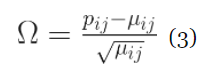

In [78]:
residuos_padronizados = np.divide((matriz_correspondencia-modelo_independencia),np.sqrt(modelo_independencia))
u,s,vh = svd(residuos_padronizados)

#Caso queiram Comparar basta utilizar o comando ao lado -> u,s,vh = np.linalg.svd(residuos_padronizados, full_matrices=False)

Estamos atrás das coordenadas das linhas. Esses pontos são organizados de forma que a distância euclidiana entre dois pontos seja igual à distância Qui² entre as duas linhas às quais eles correspondem. As pontuações das linhas são definidas como:

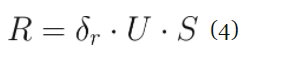

onde U e S são a matriz de vetores singulares à esquerda e os valores singulares na matriz diagonal de SVD. Quando ao deltaR é a matriz diagonal feita dos recíprocos das raízes quadradas dos totais da linha.

In [55]:
def Calculo_Scores(total_linha_coluna,u_vhT,s):
  delta_R=np.diag(np.divide(1.0, np.sqrt(total_linha_coluna)))
  return np.dot(np.dot(delta_R, u_vhT), np.diag(s))

In [56]:
scores_linhas = Calculo_Scores(total_linha, u, s)

In [57]:
scores_colunas = Calculo_Scores(total_colunas, vh.T, s)

##Variância Explicada

Vamos verificar quanto da variância cada componente está capturando

In [62]:
variancia_explicada = np.round(s**2/np.sum(s**2), decimals=3) * 100
variancia_explicada

array([39.5, 23.1, 21.5, 15.7,  0.2])

Veja que com 4 dimensões explicamos praticamente todos os nossos dados e a quinta está muita próxima de 0. Vamos então considerar somente as 4 primeiras para plotagem da variância capturada.

In [74]:
variancia_dimensional=variancia_explicada[0:4]
print(f'Variâncias Dimensionais: {variancia_dimensional}')
print(f'Variância capturada: {sum(variancia_dimensional)}%')

Variâncias Dimensionais: [39.5 23.1 21.5 15.7]
Variância capturada: 99.8%


Com 2 componentes podemos explicar em média 62.8% da variância de todos os nossos dados. Vamos visualizar isso de forma gráfica:

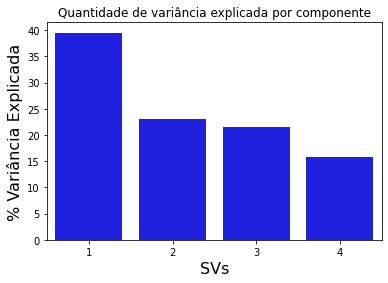

In [75]:
sns.barplot(x=list(range(1,len(variancia_dimensional)+1)), y=variancia_dimensional, color="blue")
plt.title("Quantidade de variância explicada por componente")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('% Variância Explicada', fontsize=16)
plt.show();

Vamos separar esses 2 componentes dos demais criando um dataframe.

In [59]:
def Row_Column_Scores(n_componentes=2):
  #Scores das linhas
  df_linha = pd.DataFrame(data=[l[0:n_componentes] for l in scores_linhas], columns=[f'dim{i}' for i in range(1,n_componentes+1)],index=df['country'].sort_values().unique())
  df_linha['variavel']='linha'

  #Scores das colunas
  df_coluna=pd.DataFrame(data=[l[0:n_componentes] for l in scores_colunas], columns=[f'dim{i}' for i in range(1,n_componentes+1)],index=df['lethality_Q5'].sort_values().unique())
  df_coluna['variavel']='coluna'

  #Juntar tudo
  df_final=pd.concat([df_linha,df_coluna])

  return df_final

In [60]:
df_final_dois_componentes =Row_Column_Scores()

In [61]:
df_final_dois_componentes

,dim1,dim2,variavel
Anguilla,-1.894026,0.602953,linha
Antigua And Barbuda,0.643036,0.511853,linha
Argentina,0.679113,0.185293,linha
Aruba,-0.035121,-1.190963,linha
Bahamas,0.552885,0.112752,linha
Barbados,0.296997,-0.385849,linha
Belize,0.558528,0.091621,linha
Bermuda,0.366923,-0.023637,linha
Bolivia,0.658604,0.820296,linha
"Bonaire, Saint Eustatius And Saba",-0.620864,-0.714121,linha


##Visualização dos resultados

Vamos visualizar gráficamente nossos resultados.

500

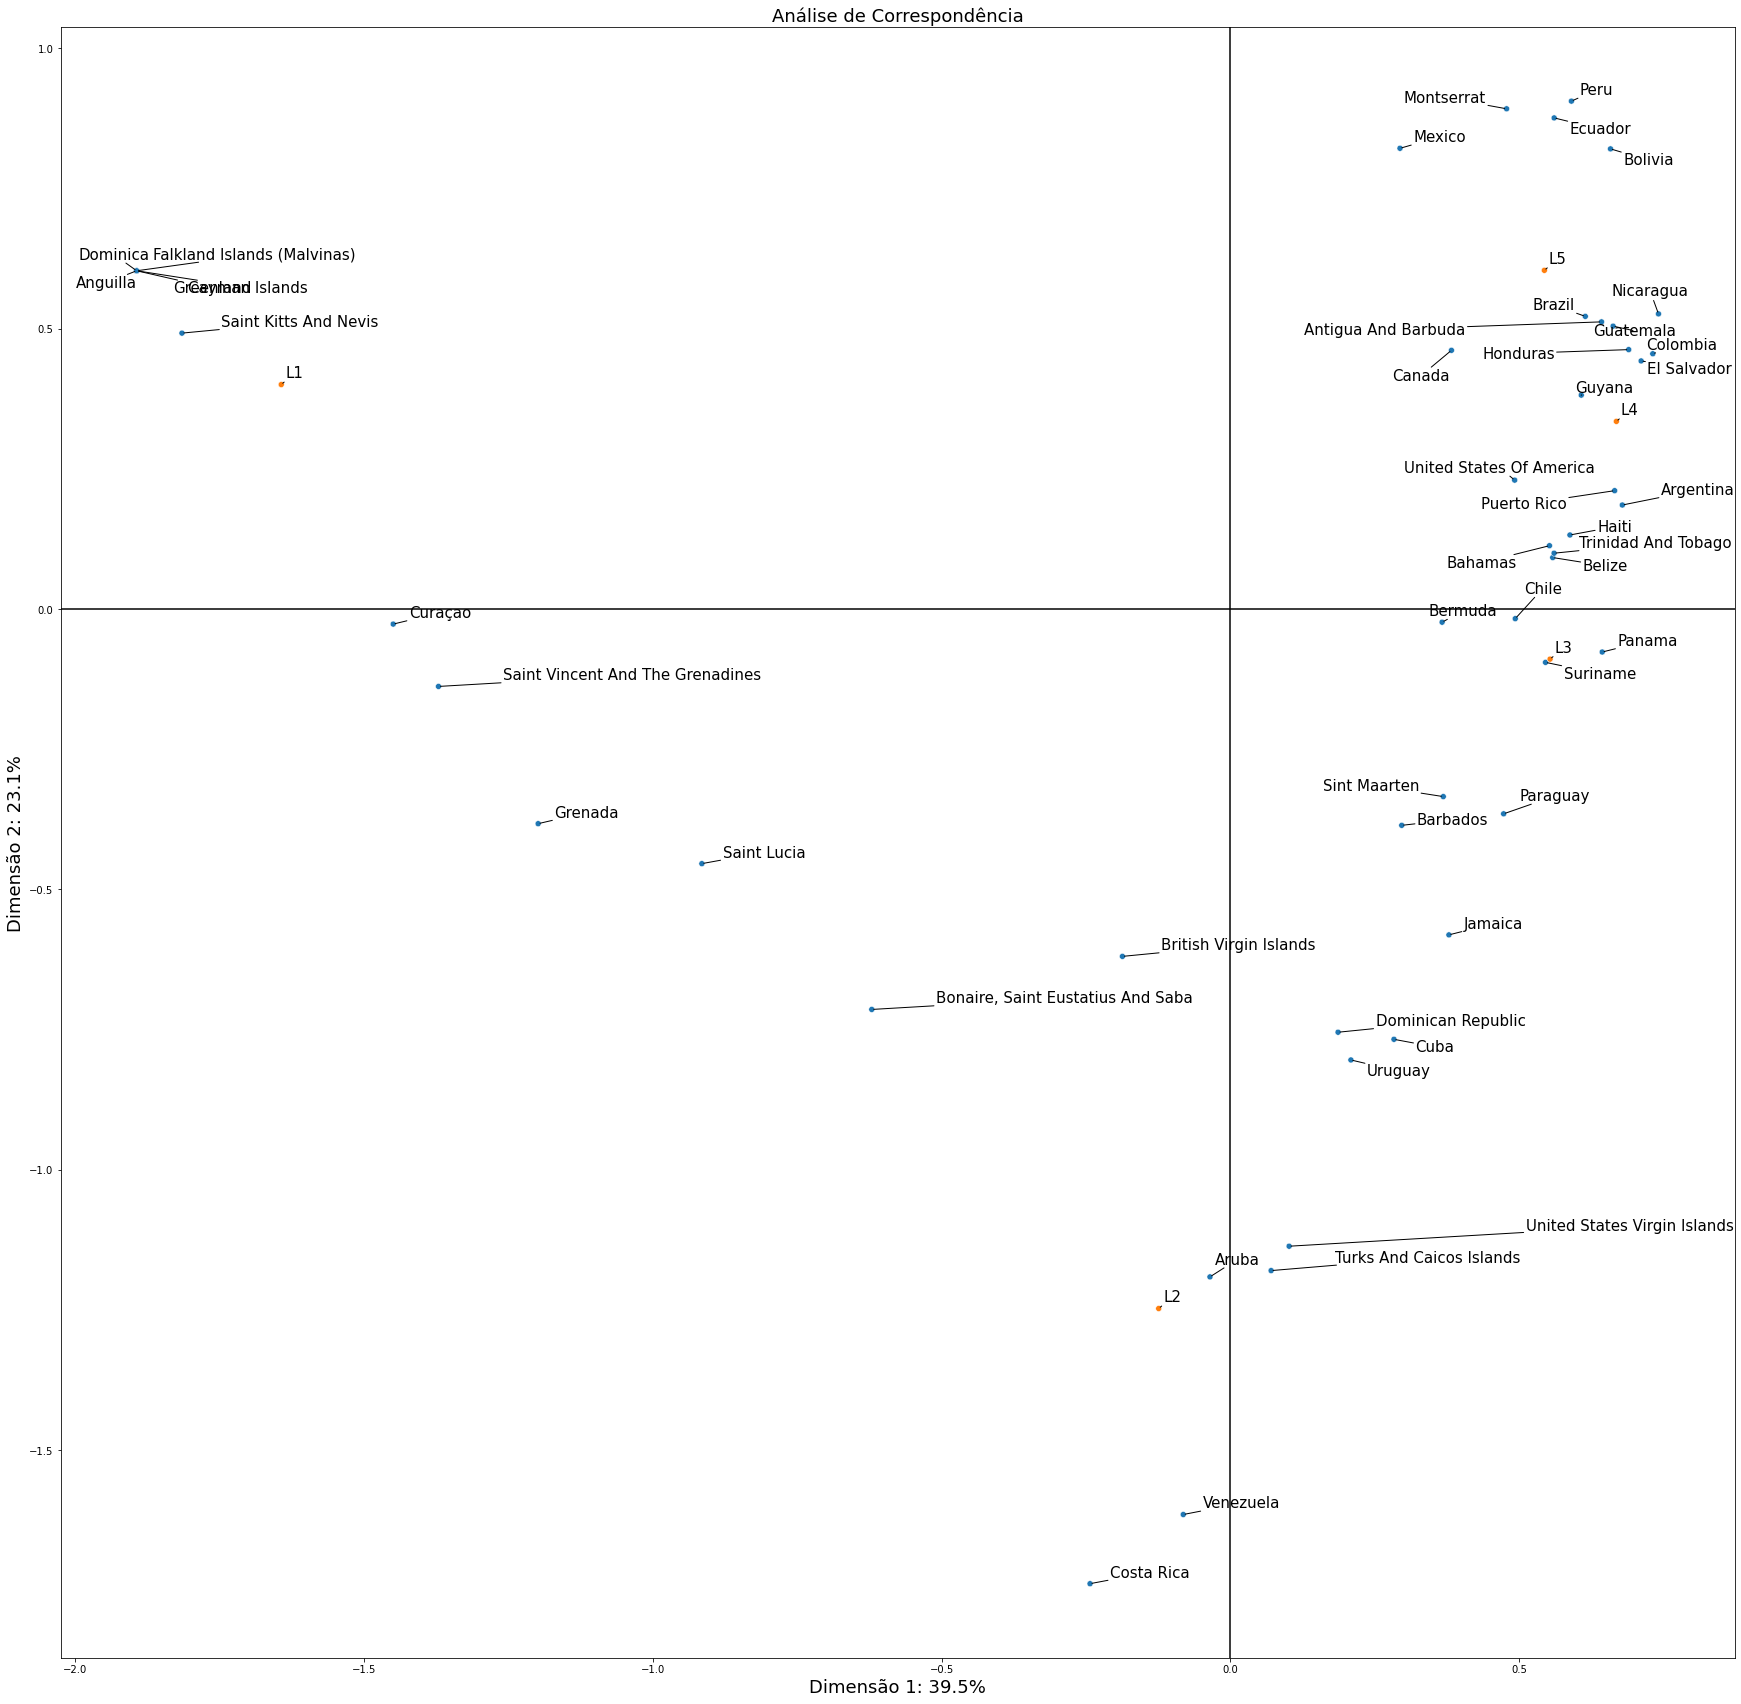

In [76]:
fig=plt.figure(figsize=(30,30))
ax = sns.scatterplot(data=df_final_dois_componentes,x='dim1', y='dim2', hue='variavel')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)
plt.title("Análise de Correspondência",fontsize=18)
plt.xlabel(f"Dimensão 1: {round(variancia_explicada[0],2)}%",fontsize=18)
plt.ylabel(f"Dimensão 2: {round(variancia_explicada[1],2)}%",fontsize=18)

texts=[]

for rotulo in df_final_dois_componentes.index:
    texts.append(plt.annotate(rotulo, 
                 (df_final_dois_componentes.loc[rotulo,:]['dim1'],
                  df_final_dois_componentes.loc[rotulo,:]['dim2']),
                 horizontalalignment='center', verticalalignment='center',size=15))
    
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1.5, 1.5), expand_text=(1.5, 1.5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1))